In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_grades

## EXPLORE

In [2]:
# setting default values for plot fonts and figure size
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))

In [5]:
# using wrangle_grades() to aqcuire csv data
df = wrangle_grades()
df.head()

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97


In [6]:
# importing
from sklearn.model_selection import train_test_split

In [7]:
# splitting data
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# observing rows to confirm porportions are correct
train.shape, validate.shape, test.shape

((81, 4), (10, 4), (11, 4))

In [8]:
# observing train data
train.head()

,exam1,exam2,exam3,final_grade
1,98,93,96,95
20,73,70,75,76
78,100,90,95,96
29,83,80,86,85
75,58,65,70,68


### CONTINUOUS AND CONTINUOUS

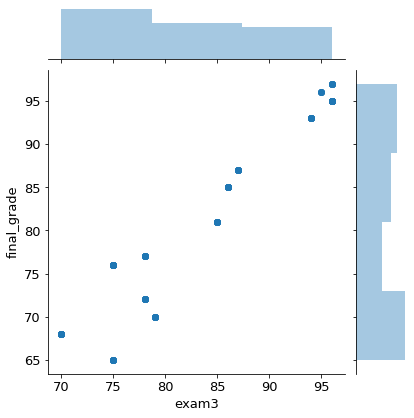

In [9]:
# joinplot showing relationship between 3rd exame grade and final grade
# generally, the better a student did on the 3rd exam, the better they did on the final
sns.jointplot(x='exam3', y='final_grade', data=train)

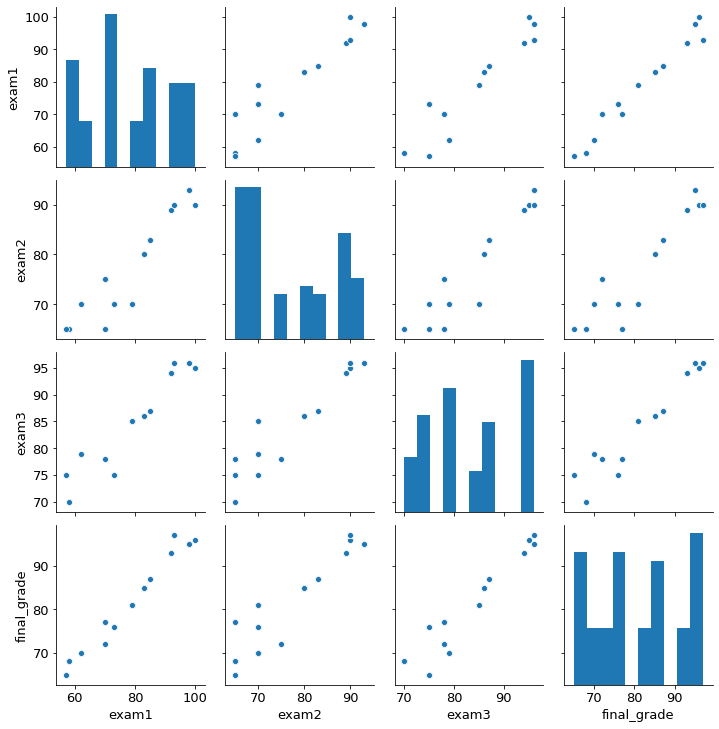

In [10]:
# observing relationship between each exam grade vs every other exam grade
sns.pairplot(train)

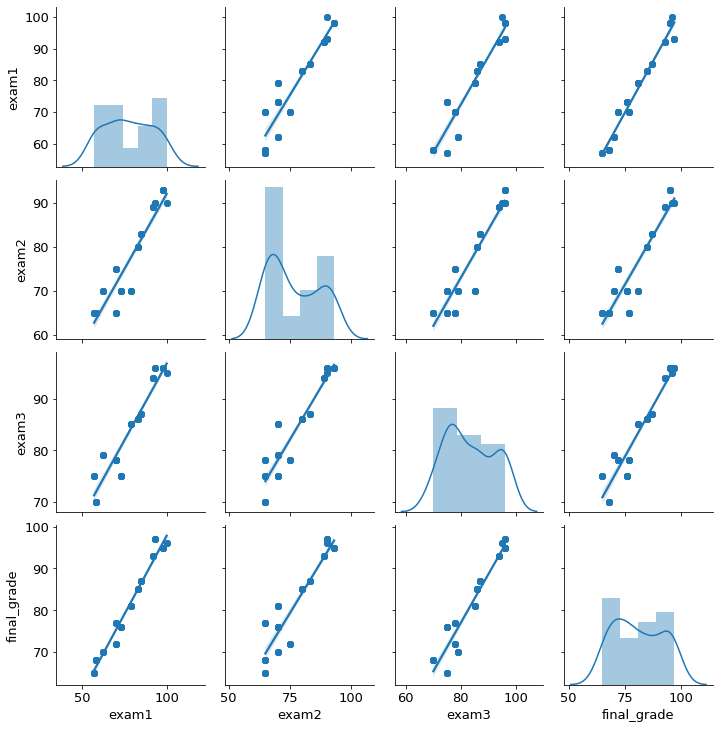

In [11]:
# creating subplots of pairwise relationships
g = sns.PairGrid(train)
g.map_diag(sns.distplot) 
g.map_offdiag(sns.regplot)

In [12]:
# observing correlation values between each exam
train.corr()

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934099,0.947911,0.985155
exam2,0.934099,1.000000,0.938353,0.926828
exam3,0.947911,0.938353,1.000000,0.954037
final_grade,0.985155,0.926828,0.954037,1.000000


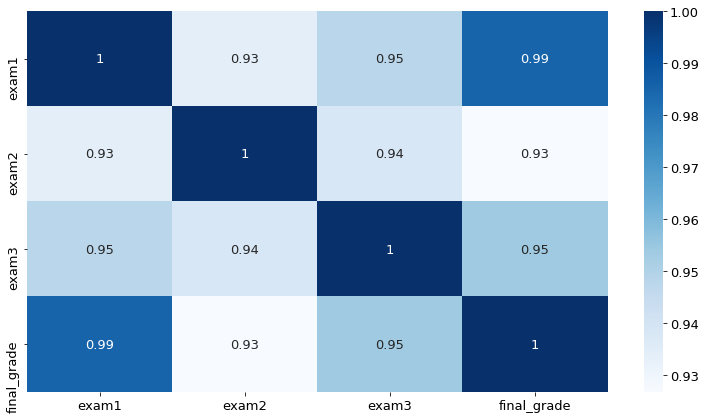

In [13]:
# observing correlation values in a heatmap
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways:
- exam 2 has the least correlation with final grade
- exam 1 has the highest correlation with final grade

Questions:
- why does exam 2 have a lower correlation?
- students are slacking midsemester
- the material covered on the final isn't the same as what is covered in exam 2
- the material covered midsemester is harder

### CONTINUOUS AND CATEGORICAL

In [15]:
# creating exam 1 letter grades column
train['exam1_letter_grade'] = pd.cut(train.exam1, bins=[0, 70, 80, 90, 105], labels=['D', 'C', 'B', 'A'])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,exam1,exam2,exam3,final_grade,exam1_letter_grade
1,98,93,96,95,A
20,73,70,75,76,C
78,100,90,95,96,A
29,83,80,86,85,B
75,58,65,70,68,D


Viz types for continuous x categorical:
- boxplot
- bar chart
- violin
- swarmplot

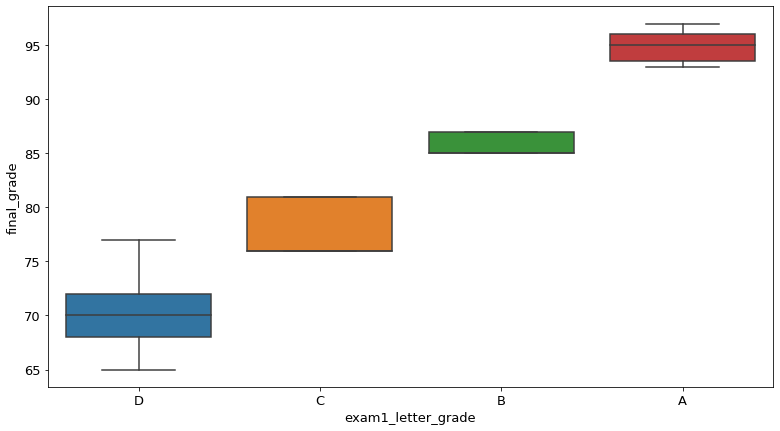

In [16]:
# creating boxplot of final grade vs letter grade from exam 1
sns.boxplot(data=train, y='final_grade', x='exam1_letter_grade')

Takeaways:
- students with Ds not only have the lowest grade, but also the most variation in grades
- maybe this is due to different study habits or workflows?
- Bs have the least variation
- maybe this is because there's fewer observations in the B category

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

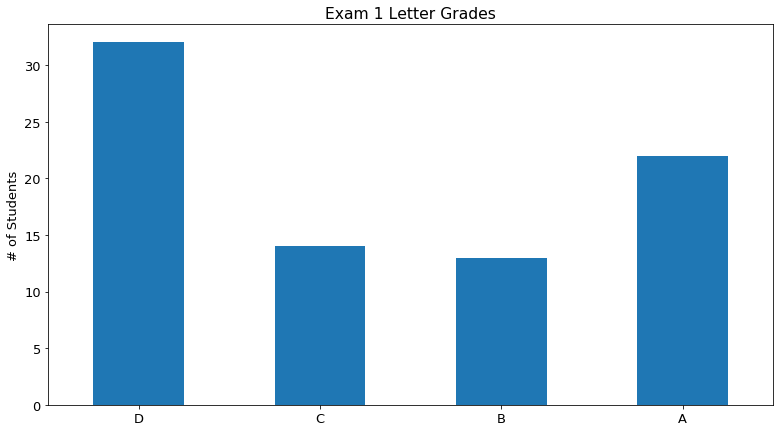

In [18]:
# creating bar plot reflect the number of students that received each letter grade on exam 1
train.exam1_letter_grade.value_counts().sort_index().plot.bar()
plt.title('Exam 1 Letter Grades')
plt.ylabel('# of Students')
plt.xticks(rotation=0)

Takeaway: there's not significantly fewer observerations in the B category, maybe this subgroup is ripe for future research.

In [19]:
# checking number of rows in train df
train.shape[0]

81

In [36]:
# creating array of randomly chosen values of one or two
np.random.choice(['One', 'Two'], train.shape[0])

array(['One', 'Two', 'One', 'One', 'One', 'Two', 'One', 'Two', 'One',
       'One', 'Two', 'One', 'Two', 'One', 'Two', 'Two', 'Two', 'One',
       'Two', 'Two', 'Two', 'One', 'Two', 'Two', 'Two', 'Two', 'Two',
       'Two', 'Two', 'One', 'Two', 'Two', 'One', 'One', 'One', 'Two',
       'One', 'One', 'One', 'One', 'One', 'One', 'Two', 'One', 'Two',
       'Two', 'One', 'One', 'One', 'One', 'One', 'Two', 'Two', 'One',
       'One', 'Two', 'One', 'Two', 'Two', 'Two', 'Two', 'One', 'Two',
       'One', 'Two', 'One', 'One', 'One', 'Two', 'One', 'One', 'One',
       'One', 'Two', 'One', 'One', 'One', 'One', 'One', 'Two', 'Two'],
      dtype='<U3')

In [21]:
# assigning a classroom of either one or two to each student randomly
np.random.seed(13)
train['classroom'] = np.random.choice(['One', 'Two'], train.shape[0])
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


(0, 100)

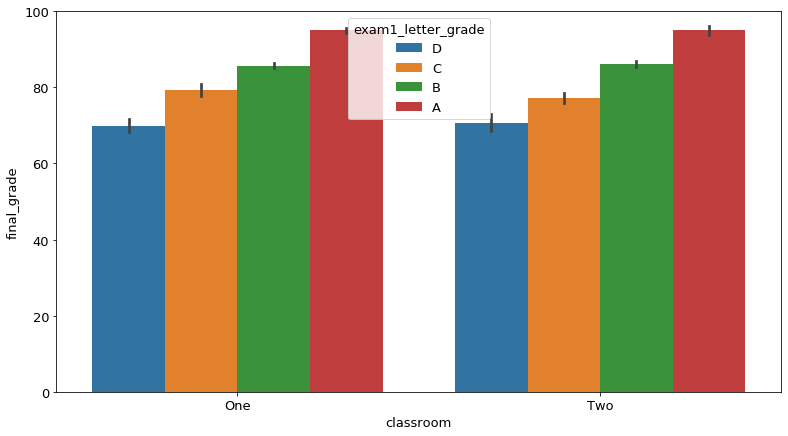

In [22]:
# barplot of count of each letter grade from exam 1 in each class
sns.barplot(data=train, y='final_grade', x='classroom', hue='exam1_letter_grade')
plt.ylim(0, 100)

Takeaway: the distribution of grades in classroom one and classroom two are about the same.

Classroom doesn't impact final grade? Let's run a hypothesis test to check.
- alpha = .05
- $H_0$: There is no difference in final grade between classroom one and two
- $H_a$: There is a difference in final grade between classroom one and two

In [37]:
from scipy import stats

# performing 2 tail, 2 sample t-test
stats.ttest_ind(
    train[train.classroom == 'One'].final_grade,
    train[train.classroom == 'Two'].final_grade,
    equal_var=False,
)

Ttest_indResult(statistic=0.866735071416622, pvalue=0.3887772518573801)

With a p-value of .025, we reject the null hypothesis that there is no difference in final grade between classroom one and classroom two.
- p-value
    * P(observe our data due to change | H0)
    * the likelihood of a false positive if the null hypothesis is true

- If we create a randomly chosen feature, we know that there is no relationship between it and the other features, however, due to chance, we will sometimes see a relationship

- takeaways
    * visualize, don't just test
    * statistical significance != business significance

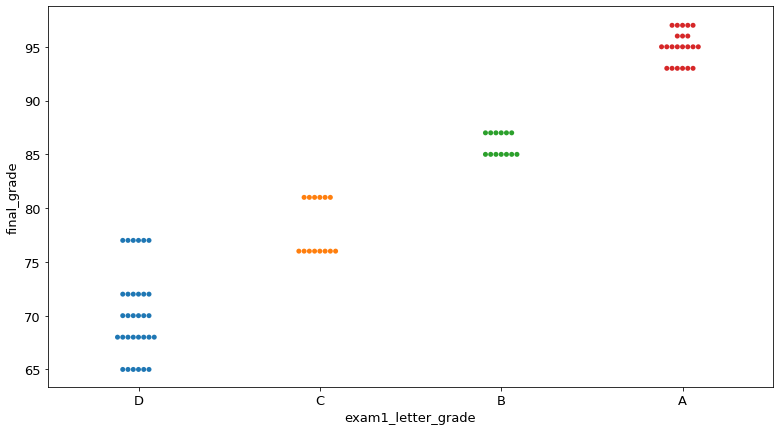

In [24]:
# creating swarmplot of final grade vs letter grade from exam 1
sns.swarmplot(data=train, y='final_grade', x='exam1_letter_grade')

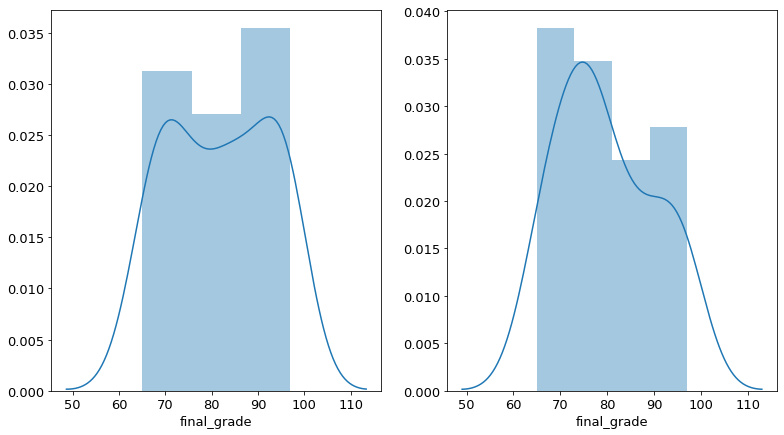

In [25]:
# creating subplots of final grades from both classes
plt.subplot(121)
sns.distplot(train[train.classroom == 'One'].final_grade)
plt.subplot(122)
sns.distplot(train[train.classroom == 'Two'].final_grade)

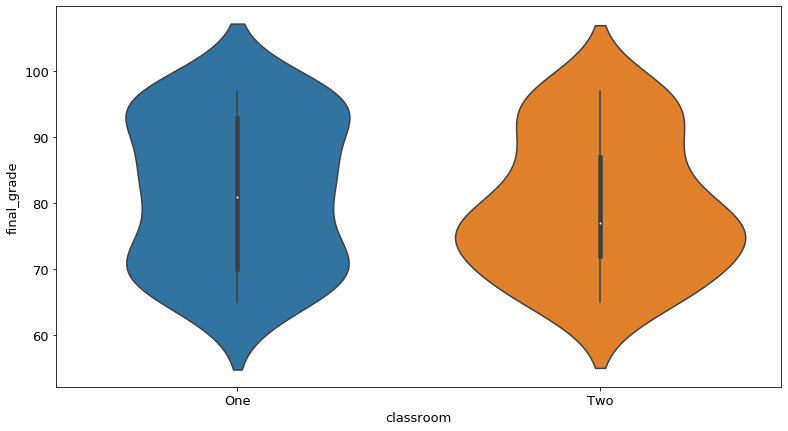

In [26]:
# creating violin plot of final grade from each classroom
sns.violinplot(data=train, y='final_grade', x='classroom')

### CATEGORICAL AND CATEGORICAL

In [27]:
# observing data in train dataset
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


In [28]:
# using crosstab with normalize argument to convert raw values to proportions
pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)

classroom,One,Two
exam1_letter_grade,,
D,0.209877,0.185185
C,0.074074,0.098765
B,0.098765,0.061728
A,0.172840,0.098765


In [29]:
# adding % symbol and rounding 
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
ctab.applymap('{:.1%}'.format)

classroom,One,Two
exam1_letter_grade,,
D,21.0%,18.5%
C,7.4%,9.9%
B,9.9%,6.2%
A,17.3%,9.9%


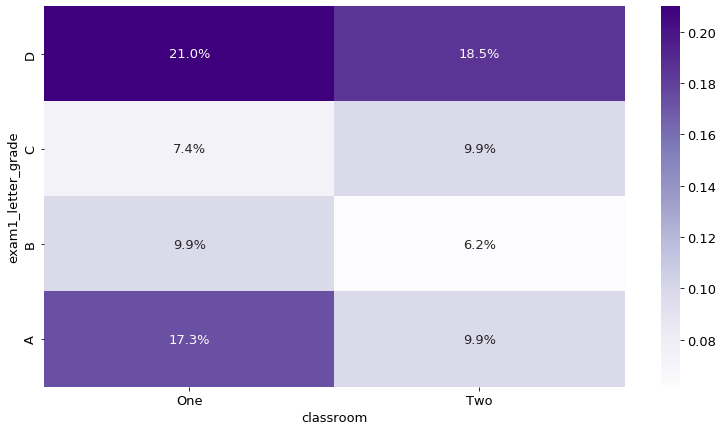

In [30]:
# plotting crosstab of exam 1 letter grades per classroom as a heatmap
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom, normalize=True)
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')

In [31]:
# creating crosstab of exam 1 letter grade proportions per classroom
pd.crosstab(train.classroom, train.exam1_letter_grade, normalize='columns')

exam1_letter_grade,D,C,B,A
classroom,,,,
One,0.53125,0.428571,0.615385,0.636364
Two,0.46875,0.571429,0.384615,0.363636


- Normalize = true vs normalize = 'columns' or 'index'
- what percentage of observations fall into the intersection of these categories (noramlize=true)
- of each subgroup, what percentage of observations fall into the other subgroup (normalize='columns' or 'index')

In [32]:
# observing train dataset data
train.head()

,exam1,exam2,exam3,final_grade,exam1_letter_grade,classroom
1,98,93,96,95,A,One
20,73,70,75,76,C,One
78,100,90,95,96,A,One
29,83,80,86,85,B,One
75,58,65,70,68,D,One


#### chi squared test

P(A and B) = P(A) * P(B) iff A and B are independent

exam 1 letter grade v classroom
- $H_0$: exam 1 letter grade and classroom are independent of each other
- $H_a$: exam 1 letter grade and classroom are dependent

In [33]:
import scipy.stats as stats

# performing chi square test 
ctab = pd.crosstab(train.exam1_letter_grade, train.classroom)
chi2_test_stat, p, degrees_freedom, expected_proportions = stats.chi2_contingency(ctab)
p

0.6234302397249452

With a p-value of .623, we fail to reject our null hypothesis.